In [100]:
import numpy
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [101]:
START_TIME = '2018-01-01T00:00:00Z'

In [116]:
SITE_CSV = '/disk2/Data/FluxSite4ET/validation/CRK_2018_2019_L2.csv'
datMMS = pd.read_csv(SITE_CSV)
datMMS

,Timestamp,RSDN(1),RSUP(1),RLDN(1),RLUP(1),RNET(1),PAR(1),PAR(2),PAR(3),WS(1),...,SWC(3),SWC(4),water_depth(1),NEE_MPTm,RE_MPTm,GPP_MPTm,LE,H,ustar,Fch4
0,2018/1/1 0:00,0.0,0.0,204.25,276.94,-72.68,NaN,0.0,0.0,1.85,...,0.11,0.12,NaN,0.04,0.04,0.00,3.53,-20.29,0.19,0.11
1,2018/1/1 0:30,0.0,0.0,203.25,275.97,-72.72,NaN,0.0,0.0,2.10,...,0.11,0.12,NaN,0.04,0.04,0.00,3.35,-18.00,0.15,0.16
2,2018/1/1 1:00,0.0,0.0,202.33,274.04,-71.72,NaN,0.0,0.0,2.30,...,0.11,0.12,NaN,0.04,0.04,0.00,3.26,-17.46,0.12,0.14
3,2018/1/1 1:30,0.0,0.0,202.60,273.36,-70.76,NaN,0.0,0.0,2.26,...,0.11,0.12,NaN,0.04,0.04,0.00,3.85,-13.06,0.08,0.14
4,2018/1/1 2:00,0.0,0.0,201.90,273.08,-71.18,NaN,0.0,0.0,2.68,...,0.11,0.12,NaN,0.04,0.04,0.00,3.26,-28.66,0.10,0.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,2019/12/31 21:30,0.0,0.0,193.99,272.47,-78.48,0.0,0.0,0.0,2.18,...,0.18,0.26,1.26,0.02,0.02,0.00,10.98,0.42,0.09,0.03
35036,2019/12/31 22:00,0.0,0.0,195.08,271.80,-76.72,0.0,0.0,0.0,2.21,...,0.18,0.26,1.26,0.04,0.02,-0.02,10.98,1.64,0.08,0.30
35037,2019/12/31 22:30,0.0,0.0,226.73,275.23,-48.50,0.0,0.0,0.0,1.63,...,0.18,0.26,1.26,0.05,0.02,-0.04,6.57,-1.69,0.16,0.14
35038,2019/12/31 23:00,0.0,0.0,258.46,280.54,-22.09,0.0,0.0,0.0,1.66,...,0.17,0.26,1.26,0.02,0.02,0.00,12.19,4.16,0.17,0.36


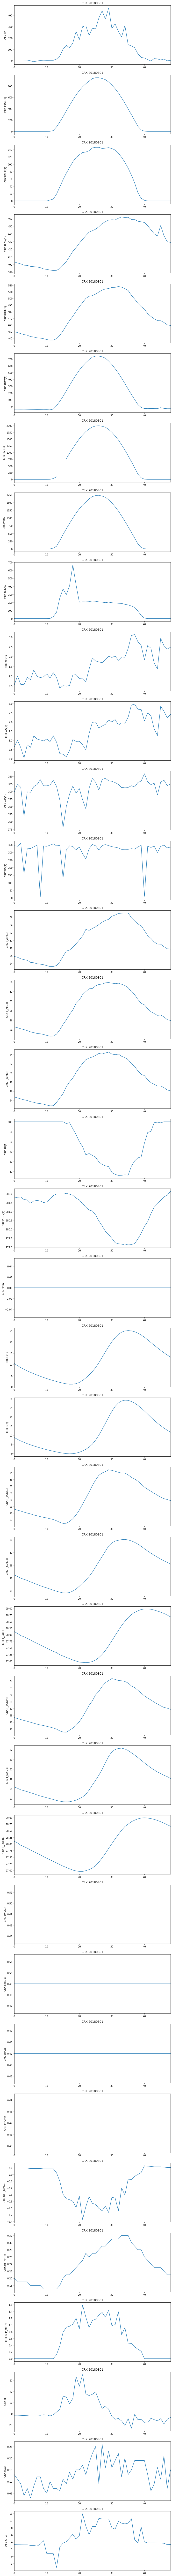

In [122]:
data_labels = ['LE', 'RSDN(1)','RSUP(1)','RLDN(1)','RLUP(1)','RNET(1)','PAR(1)','PAR(2)','PAR(3)','WS(1)','WS(2)', 'WD(1)','WD(2)','T_AIR(1)','T_AIR(2)', 'T_AIR(3)', 'RH(1)','Press(1)','PPT(1)', 'G(1)','G(2)','T_SOIL(1)', 'T_SOIL(2)','T_SOIL(3)','T_SOIL(4)','T_SOIL(5)','T_SOIL(6)', 'SWC(1)', 'SWC(2)','SWC(3)', 'SWC(4)', 'NEE_MPTm','RE_MPTm','GPP_MPTm', 'H', 'ustar', 'Fch4']
# data_labels = ['LE', 'WS(1)', 'WS(2)']

# data_labels = ['LE','RNET(1)','WS(1)','WD(1)', 'NEE_MPTm','GPP_MPTm', 'ustar', 'Fch4']
fig, axes = plt.subplots(len(data_labels), 1, figsize=(10, 4 * len(data_labels)))

# doy = 110
# doy = 223
# doy = 212
doy = 213
# doy = 217
doy1_date = datetime.strptime(START_TIME, "%Y-%m-%dT%H:%M:%SZ")
doyc_date = doy1_date + timedelta(days=(int(doy)-1))
doyc_YYYYmmdd = doyc_date.strftime("%Y%m%d")
for idx in range(len(data_labels)):
    try:
        r_data = numpy.array(datMMS[data_labels[idx]])[2*24*(doy-1):2*24*doy+1].astype(float)
        axes[idx].plot(numpy.arange(24 * 2+1), r_data)
        axes[idx].set_title('CRK ' + doyc_YYYYmmdd)
        axes[idx].set_xlim(0, 2*24)
        axes[idx].set_ylabel('CRK ' + data_labels[idx])
    except Exception as e:
        print(data_labels[idx])
        print(e)

plt.tight_layout()
plt.show()

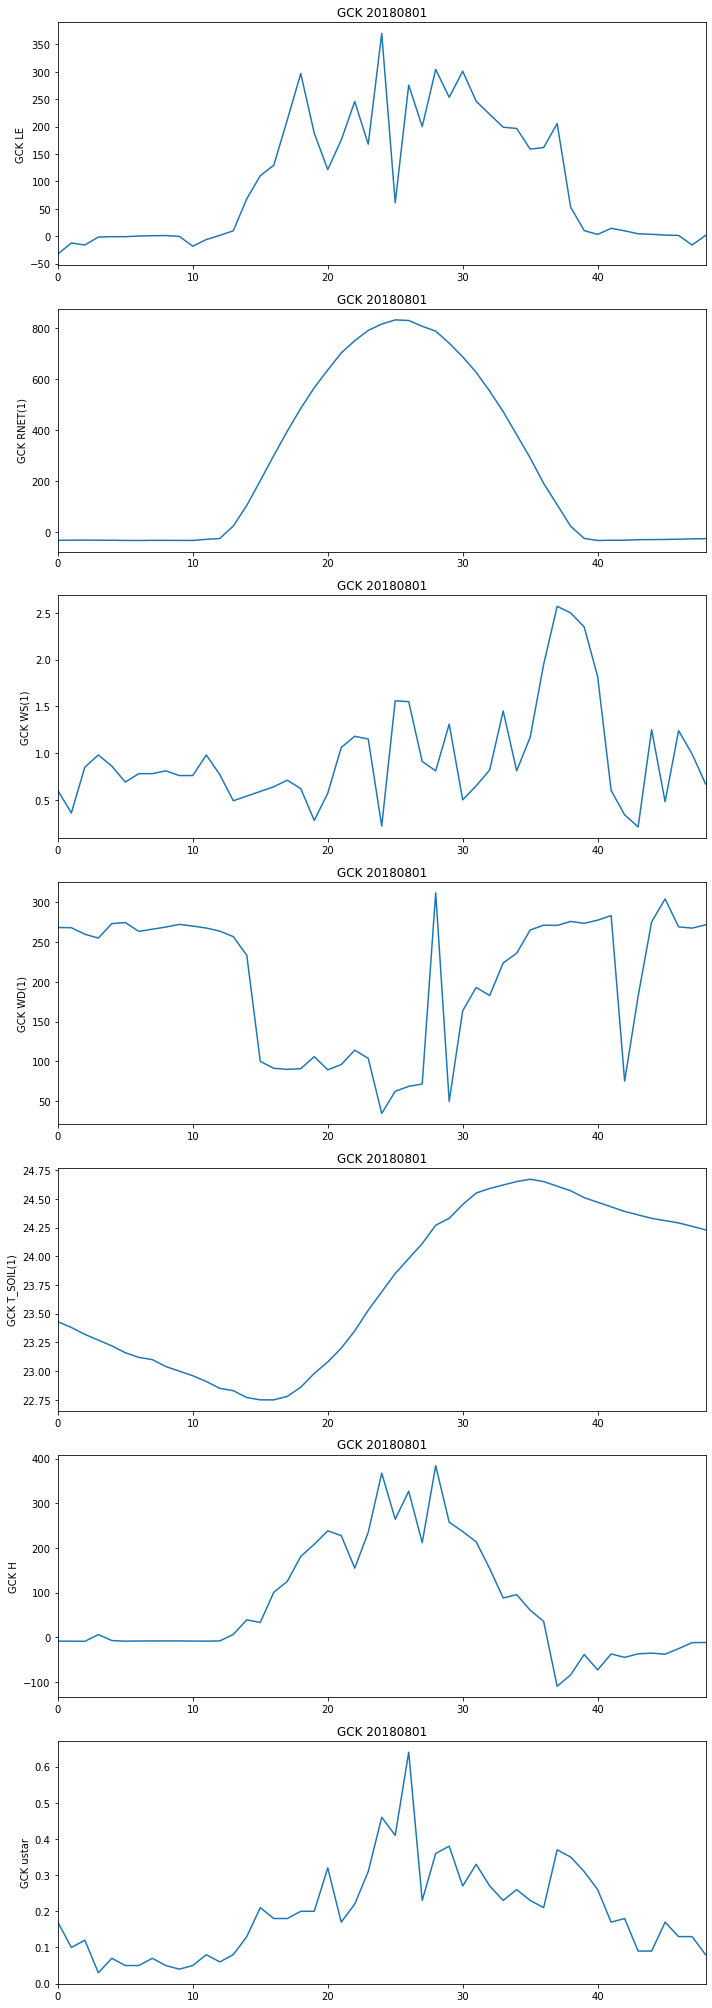

In [112]:
SITE_CSV = '/disk2/Data/FluxSite4ET/validation/GCK_2018_2019_L2.csv'
datMMS = pd.read_csv(SITE_CSV)

# data_labels = ['LE', 'RSDN(1)','RSUP(1)','RLDN(1)','RLUP(1)','RNET(1)','PAR(1)','PAR(2)','PAR(3)','WS(1)','WS(2)', 'WD(1)','WD(2)','T_AIR(1)','T_AIR(2)', 'T_AIR(3)', 'RH(1)','Press(1)','PPT(1)', 'G(1)','G(2)','T_SOIL(1)', 'T_SOIL(2)','T_SOIL(3)','T_SOIL(4)','T_SOIL(5)','T_SOIL(6)', 'SWC(1)', 'SWC(2)','SWC(3)', 'SWC(4)', 'NEE_MPTm','RE_MPTm','GPP_MPTm', 'H', 'ustar', 'Fch4']
# data_labels = ['LE', 'WS(1)', 'WS(2)']
data_labels = ['LE', 'RNET(1)','WS(1)', 'WD(1)','T_SOIL(1)','H', 'ustar']
fig, axes = plt.subplots(len(data_labels), 1, figsize=(10, 4 * len(data_labels)))

doy = 213
doy1_date = datetime.strptime(START_TIME, "%Y-%m-%dT%H:%M:%SZ")
doyc_date = doy1_date + timedelta(days=(int(doy)-1))
doyc_YYYYmmdd = doyc_date.strftime("%Y%m%d")
for idx in range(len(data_labels)):
    try:
        r_data = numpy.array(datMMS[data_labels[idx]])[2*24*(doy-1):2*24*doy+1].astype(float)
        axes[idx].plot(numpy.arange(24 * 2+1), r_data)
        axes[idx].set_title('GCK ' + doyc_YYYYmmdd)
        axes[idx].set_xlim(0, 2*24)
        axes[idx].set_ylabel('GCK ' + data_labels[idx])
    except Exception as e:
        print(data_labels[idx])
        print(e)

plt.tight_layout()
plt.show()

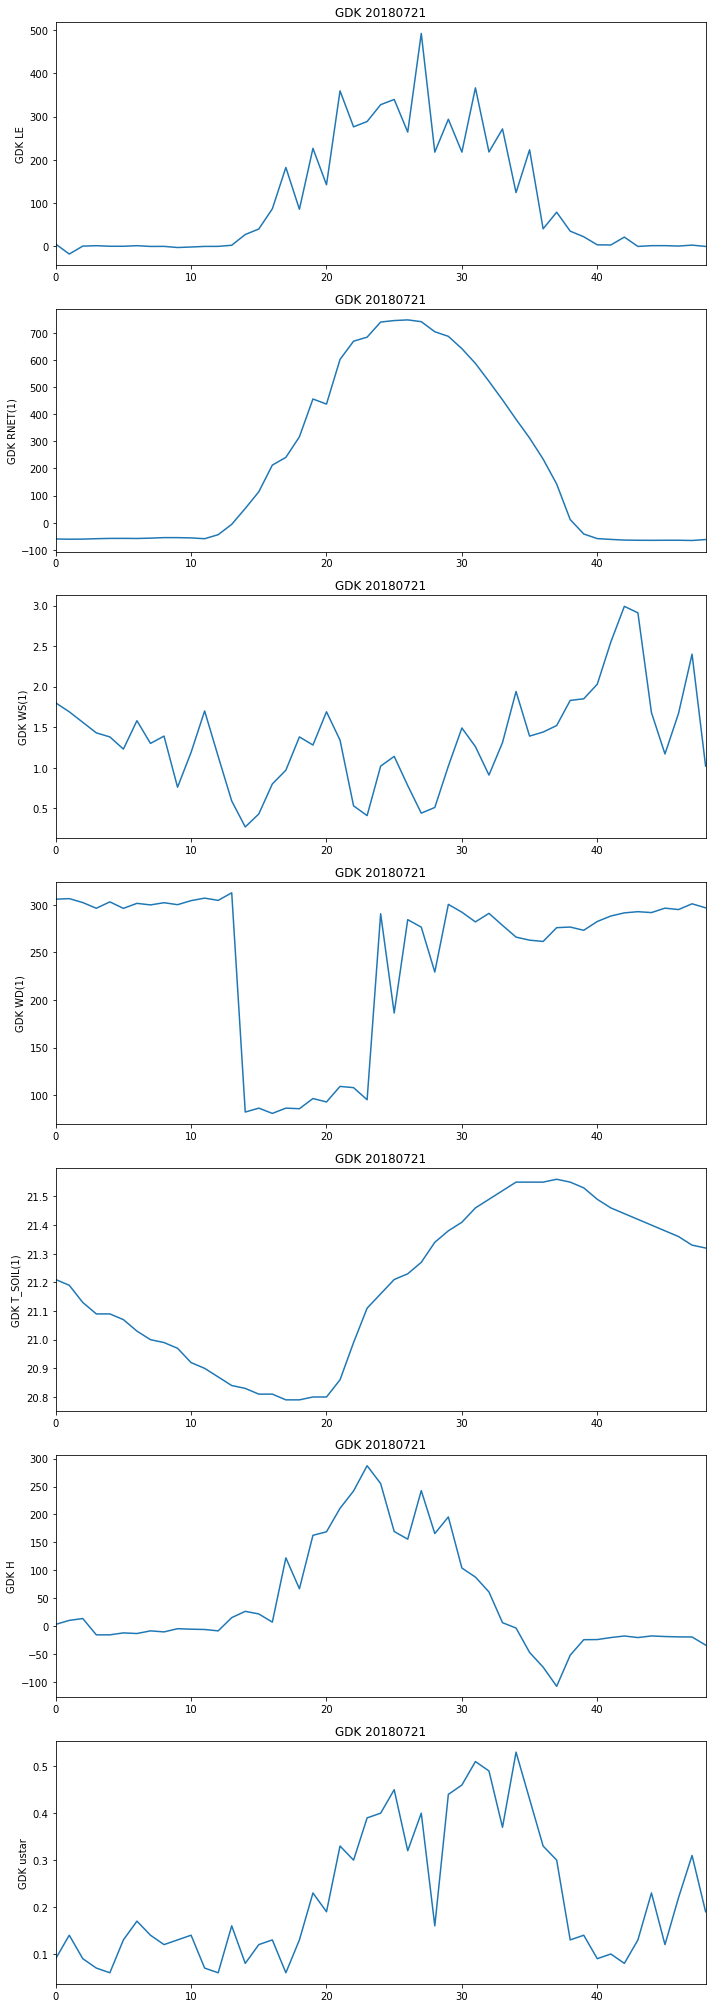

In [114]:
SITE_CSV = '/disk2/Data/FluxSite4ET/validation/GDK_2018_2019_L2.csv'
datMMS = pd.read_csv(SITE_CSV)

# data_labels = ['LE', 'RSDN(1)','RSUP(1)','RLDN(1)','RLUP(1)','RNET(1)','PAR(1)','PAR(2)','PAR(3)','WS(1)','WS(2)', 'WD(1)','WD(2)','T_AIR(1)','T_AIR(2)', 'T_AIR(3)', 'RH(1)','Press(1)','PPT(1)', 'G(1)','G(2)','T_SOIL(1)', 'T_SOIL(2)','T_SOIL(3)','T_SOIL(4)','T_SOIL(5)','T_SOIL(6)', 'SWC(1)', 'SWC(2)','SWC(3)', 'SWC(4)', 'NEE_MPTm','RE_MPTm','GPP_MPTm', 'H', 'ustar', 'Fch4']
# data_labels = ['LE', 'WS(1)', 'WS(2)']
data_labels = ['LE', 'RNET(1)','WS(1)', 'WD(1)','T_SOIL(1)','H', 'ustar']
fig, axes = plt.subplots(len(data_labels), 1, figsize=(10, 4 * len(data_labels)))

doy = 202
doy1_date = datetime.strptime(START_TIME, "%Y-%m-%dT%H:%M:%SZ")
doyc_date = doy1_date + timedelta(days=(int(doy)-1))
doyc_YYYYmmdd = doyc_date.strftime("%Y%m%d")
for idx in range(len(data_labels)):
    try:
        r_data = numpy.array(datMMS[data_labels[idx]])[2*24*(doy-1):2*24*doy+1].astype(float)
        axes[idx].plot(numpy.arange(24 * 2+1), r_data)
        axes[idx].set_title('GDK ' + doyc_YYYYmmdd)
        axes[idx].set_xlim(0, 2*24)
        axes[idx].set_ylabel('GDK ' + data_labels[idx])
    except Exception as e:
        print(data_labels[idx])
        print(e)

plt.tight_layout()
plt.show()